# IA 340 Mini Project
**Project Title:** Seasonal Patterns in Cannabis Retail

## Research Question: How have average product prices and total sales volumes for adult-use and medical cannabis changed over time, and what patterns emerge across seasons or calendar months?

The dataset acquired comes from Data.gov and tracks weekly cannabis retail sales in Connecticut from January 2023 to September 2025, detailing adult-use and medical sales, product volumes, and average prices. The research question explores how these metrics (especially prices and sales volumes) have changed over time and whether seasonal or monthly patterns emerge across the two market segments. This dataset was chosen since it provides metrics on cannabis usage over time.

Source: https://catalog.data.gov/dataset/cannabis-retail-sales-by-week-ending



### Importing data from S3:

In [5]:
import warnings
warnings.simplefilter('ignore')

In [6]:
import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-960915131/Cannabis_Retail_Sales_by_Week_Ending.csv') # load the data from s3
df.head() #show the top 5 rows

,Week Ending,Adult-Use Retail Sales,Medical Marijuana Retail Sales,Total Adult-Use and Medical Sales,Adult-Use Products Sold,Medical Products Sold,Total Products Sold,Adult-Use Average Product Price,Medical Average Product Price
0,01/14/2023,1485019.32,1776700.69,3261720.01,33610,49312,82922,44.25,36.23
1,01/21/2023,1487815.81,2702525.61,4190341.42,33005,77461,110466,45.08,34.89
2,01/28/2023,1553216.30,2726237.56,4279453.86,34854,76450,111304,44.56,35.65
3,01/31/2023,578840.62,863287.86,1442128.48,12990,24023,37013,44.56,35.93
4,02/04/2023,1047436.20,1971731.40,3019167.60,24134,56666,80800,43.49,34.84


## Cleaning Data:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Week Ending                        171 non-null    object 
 1   Adult-Use Retail Sales             171 non-null    float64
 2   Medical Marijuana Retail Sales     171 non-null    float64
 3   Total Adult-Use and Medical Sales  171 non-null    float64
 4   Adult-Use Products Sold            171 non-null    int64  
 5   Medical Products Sold              171 non-null    int64  
 6   Total Products Sold                171 non-null    int64  
 7   Adult-Use Average Product Price    171 non-null    float64
 8   Medical Average Product Price      171 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 12.1+ KB


In [8]:
df.describe()

,Adult-Use Retail Sales,Medical Marijuana Retail Sales,Total Adult-Use and Medical Sales,Adult-Use Products Sold,Medical Products Sold,Total Products Sold,Adult-Use Average Product Price,Medical Average Product Price
count,1.710000e+02,1.710000e+02,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000
mean,2.951310e+06,1.627303e+06,4.578612e+06,78601.169591,45743.818713,124422.345029,37.933977,35.151696
std,1.170702e+06,6.912528e+05,1.574191e+06,33877.839677,18715.446979,44603.321664,2.745363,2.106195
min,1.639950e+05,6.283767e+04,2.268327e+05,4188.000000,1916.000000,6104.000000,31.400000,31.410000
25%,2.093591e+06,1.283401e+06,3.815982e+06,53002.500000,38213.000000,104169.500000,36.670000,33.595000
50%,3.411082e+06,1.562011e+06,5.418637e+06,88998.000000,45528.000000,144094.000000,38.420000,35.020000
75%,3.948997e+06,2.137822e+06,5.580930e+06,102986.000000,59381.000000,153060.500000,39.600000,36.355000
max,4.495102e+06,3.085787e+06,7.290974e+06,134368.000000,86307.000000,199162.000000,45.080000,41.830000


In [9]:
df.shape

(171, 9)

In [10]:
df= df.dropna() #drop nulls
df.isnull().sum() #check for null values

Week Ending                          0
Adult-Use Retail Sales               0
Medical Marijuana Retail Sales       0
Total Adult-Use and Medical Sales    0
Adult-Use Products Sold              0
Medical Products Sold                0
Total Products Sold                  0
Adult-Use Average Product Price      0
Medical Average Product Price        0
dtype: int64

In [24]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 Week_Ending                       0
Adult_Use_Retail_Sales            0
Medical_Marijuana_Retail_Sales    0
Total_Sales                       0
Adult_Use_Products_Sold           0
Medical_Products_Sold             0
Total_Products_Sold               0
Adult_Use_Avg_Price               0
Medical_Avg_Price                 0
Adult_Use_Share                   0
Price_Ratio                       0
dtype: int64


In [25]:
df.drop_duplicates(inplace=True)

In [27]:
numeric_cols = [
    "Adult_Use_Retail_Sales", "Medical_Marijuana_Retail_Sales", "Total_Sales",
    "Adult_Use_Products_Sold", "Medical_Products_Sold", "Total_Products_Sold",
    "Adult_Use_Avg_Price", "Medical_Avg_Price"
]

for col in numeric_cols:
    assert (df[col] >= 0).all(), f"Invalid negative values found in {col}"


### The dataset was profiled using .info() and .describe() to check structure and summary statistics. The Week Ending column was converted to datetime format for time-based analysis. Missing and duplicate rows were removed to ensure data quality. All numeric fields were validated to confirm they contain non-negative values. Column names were standardized for easier access and consistent querying. These steps prepared the dataset for reliable analysis and visualization.

## Process/Aggregate

In [15]:
df.rename(columns={
    "Week Ending": "Week_Ending",
    "Adult-Use Retail Sales": "Adult_Use_Retail_Sales",
    "Medical Marijuana Retail Sales": "Medical_Marijuana_Retail_Sales",
    "Total Adult-Use and Medical Sales": "Total_Sales",
    "Adult-Use Products Sold": "Adult_Use_Products_Sold",
    "Medical Products Sold": "Medical_Products_Sold",
    "Total Products Sold": "Total_Products_Sold",
    "Adult-Use Average Product Price": "Adult_Use_Avg_Price",
    "Medical Average Product Price": "Medical_Avg_Price"
}, inplace=True)

# Add derived metrics (two new variables)
df["Adult_Use_Share"] = df["Adult_Use_Retail_Sales"] / df["Total_Sales"]
df["Price_Ratio"] = df["Adult_Use_Avg_Price"] / df["Medical_Avg_Price"]

In [16]:
df.head()

,Week_Ending,Adult_Use_Retail_Sales,Medical_Marijuana_Retail_Sales,Total_Sales,Adult_Use_Products_Sold,Medical_Products_Sold,Total_Products_Sold,Adult_Use_Avg_Price,Medical_Avg_Price,Adult_Use_Share,Price_Ratio
0,01/14/2023,1485019.32,1776700.69,3261720.01,33610,49312,82922,44.25,36.23,0.455287,1.221364
1,01/21/2023,1487815.81,2702525.61,4190341.42,33005,77461,110466,45.08,34.89,0.355058,1.292061
2,01/28/2023,1553216.30,2726237.56,4279453.86,34854,76450,111304,44.56,35.65,0.362947,1.249930
3,01/31/2023,578840.62,863287.86,1442128.48,12990,24023,37013,44.56,35.93,0.401379,1.240189
4,02/04/2023,1047436.20,1971731.40,3019167.60,24134,56666,80800,43.49,34.84,0.346929,1.248278


### The derived metrics quantify shifts in consumer behavior and pricing dynamics between adult-use and medical cannabis over time. These indicators directly support the research question by revealing seasonal patterns, pricing trends, and evolving market dominance within Connecticut’s cannabis industry.

## Query

In [19]:
df["Week_Ending"] = pd.to_datetime(df["Week_Ending"])

filtered_df = df[
    (df["Week_Ending"].dt.year == 2024) &
    (df["Adult_Use_Retail_Sales"] > 4000000)
]

# Display the filtered DataFrame
filtered_df[[
    "Week_Ending",
    "Adult_Use_Retail_Sales",
    "Medical_Marijuana_Retail_Sales",
    "Total_Sales"
]]

,Week_Ending,Adult_Use_Retail_Sales,Medical_Marijuana_Retail_Sales,Total_Sales
103,2024-08-31,4095195.39,1818866.96,5914062.35
115,2024-11-09,4040417.73,1527343.83,5567761.56
118,2024-11-30,4270473.55,1646960.11,5917433.66
121,2024-12-21,4351573.03,1694303.75,6045876.78
122,2024-12-28,4339416.93,1505945.51,5845362.44


### This filtering of data helps to identify high-performing weeks in the adult-use market, which could be tied to seasonal demand, promotions, or policy changes.

## Visualize

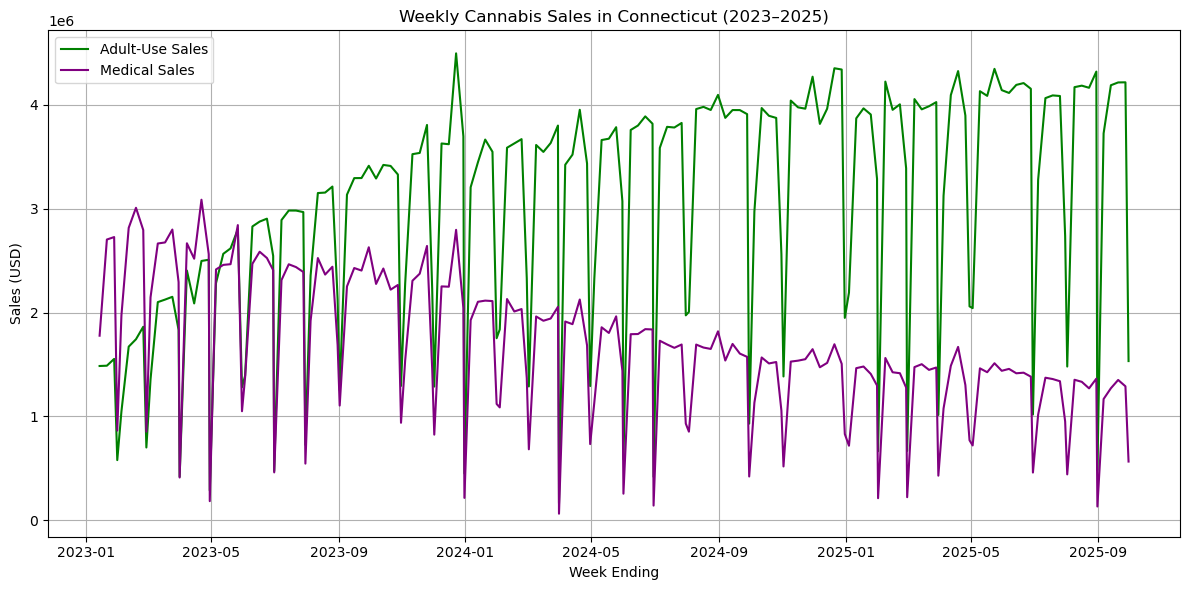

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["Week_Ending"], df["Adult_Use_Retail_Sales"], label="Adult-Use Sales", color="green")
plt.plot(df["Week_Ending"], df["Medical_Marijuana_Retail_Sales"], label="Medical Sales", color="purple")
plt.title("Weekly Cannabis Sales in Connecticut (2023–2025)")
plt.xlabel("Week Ending")
plt.ylabel("Sales (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### This line chart shows weekly cannabis retail sales for adult-use and medical markets in Connecticut. It reveals a clear upward trend in adult-use sales over time, while medical sales remain relatively stable or decline slightly. Seasonal spikes—especially around year-end holidays—are also visible.

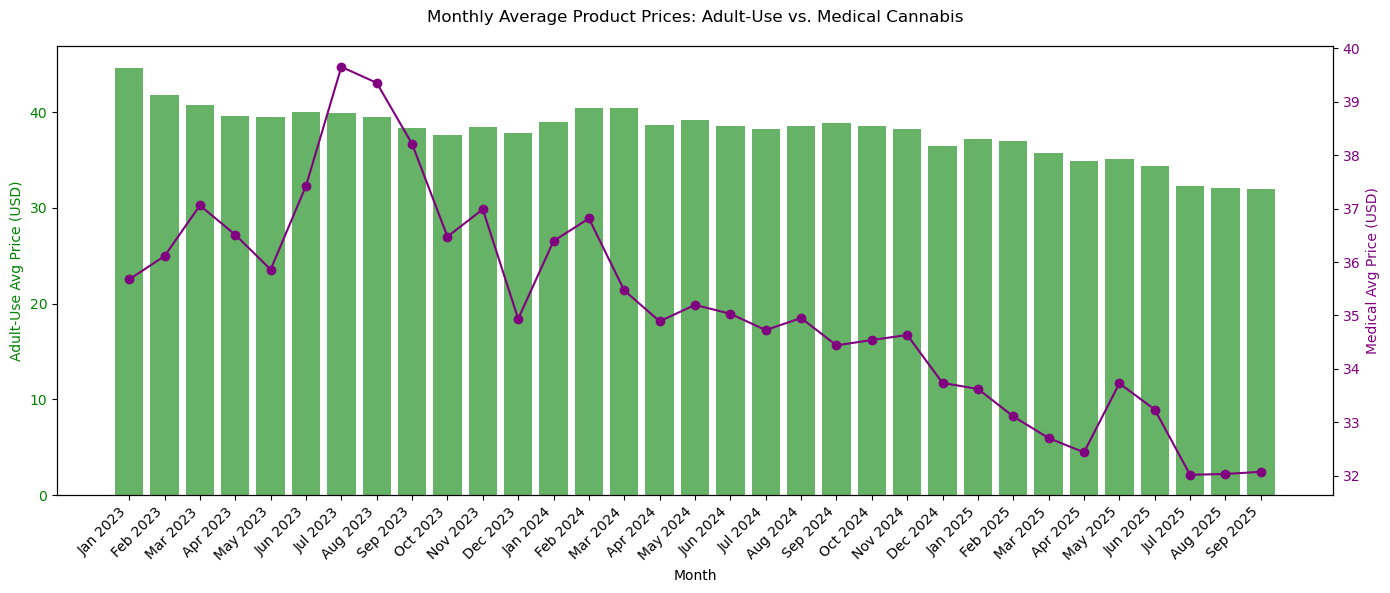

In [23]:
import matplotlib.pyplot as plt

# Ensure datetime format
df["Week_Ending"] = pd.to_datetime(df["Week_Ending"])

# Group by month and calculate mean prices
monthly_avg = df.groupby(df["Week_Ending"].dt.to_period("M")).agg({
    "Adult_Use_Avg_Price": "mean",
    "Medical_Avg_Price": "mean"
}).reset_index()

# Convert period to string for plotting
monthly_avg["Month"] = monthly_avg["Week_Ending"].dt.strftime("%b %Y")

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar chart for adult-use prices
ax1.bar(monthly_avg["Month"], monthly_avg["Adult_Use_Avg_Price"], color="green", alpha=0.6, label="Adult-Use Avg Price")
ax1.set_ylabel("Adult-Use Avg Price (USD)", color="green")
ax1.set_xlabel("Month")
ax1.tick_params(axis="y", labelcolor="green")
ax1.set_xticklabels(monthly_avg["Month"], rotation=45, ha="right")

# Line chart for medical prices
ax2 = ax1.twinx()
ax2.plot(monthly_avg["Month"], monthly_avg["Medical_Avg_Price"], color="purple", marker="o", label="Medical Avg Price")
ax2.set_ylabel("Medical Avg Price (USD)", color="purple")
ax2.tick_params(axis="y", labelcolor="purple")

fig.suptitle("Monthly Average Product Prices: Adult-Use vs. Medical Cannabis")
fig.tight_layout()
plt.show()



### This dual-axis chart compares monthly average product prices for adult-use (bar) and medical (line) cannabis in Connecticut. It shows that adult-use prices are consistently higher, but both markets exhibit a gradual decline over time. This suggests increased competition, market maturity, or pricing policy shifts.